In [29]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
df_full = pd.read_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/data_collection/Data Verification.csv')
df = df_full[['Filename', 'Pose 1', 'Pose 2','Face Obstructed', 'Hands on Face', 'Notes']].copy()
df.head()

,Filename,Pose 1,Pose 2,Face Obstructed,Hands on Face,Notes
0,Pose_9_Yoga-with-Souvik_317.jpg,0,NaN,NaN,NaN,NaN
1,Pose_9_Yoga-with-Souvik_316.jpg,0,NaN,NaN,NaN,NaN
2,Pose_9_Yoga-with-Souvik_315.jpg,9,NaN,NaN,NaN,NaN
3,Pose_9_Yoga-with-Souvik_314.jpg,0,NaN,NaN,NaN,NaN
4,Pose_9_Yoga-with-Souvik_313.jpg,0,NaN,NaN,NaN,NaN


In [6]:
double_df = df[~df['Pose 2'].isnull()]
df_left = double_df[['Filename', 'Pose 1', 'Hands on Face', 'Face Obstructed', 'Notes']].copy()
df_right = double_df[['Filename', 'Pose 2', 'Hands on Face', 'Face Obstructed', 'Notes']].copy()
dupe_filenames = df_left['Filename'].tolist()

df_left['split_filename'] = df_left['Filename'].apply(lambda x: x.split('_'))
df_left['l_filename'] = df_left['split_filename'].apply(lambda x: "_".join([x[0], x[1], x[2]+"-L", x[3]]))
df_left = df_left.drop(['split_filename', 'Filename'], axis=1)
df_left.rename(columns={'l_filename': 'Filename', 'Pose 1':'Pose'}, inplace=True)
df_left.head()

df_right['split_filename'] = df_right['Filename'].apply(lambda x: x.split('_'))
df_right['r_filename'] = df_right['split_filename'].apply(lambda x: "_".join([x[0], x[1], x[2]+"-R", x[3]]))
df_right = df_right.drop(['split_filename', 'Filename'], axis=1)
df_right.rename(columns={'r_filename': 'Filename', 'Pose 2':'Pose'}, inplace=True)
df_right.head()

print("Before dropping double rows: ", df.shape)
df2 = df[~df['Filename'].isin(dupe_filenames)]
print("After dropping 571 double rows: ", df2.shape)
df2.rename(columns={'Pose 1':'Pose'}, inplace=True)
df2.drop(['Pose 2'], axis=1, inplace=True)
df2 = df2.append(df_left, ignore_index=True)
df2 = df2.append(df_right, ignore_index=True)
print("After appending 571x2 rows: ", df2.shape)
# Fill in missing values
df2['Face Obstructed'].fillna(0, inplace=True)
df2['Hands on Face'].fillna(0, inplace=True)
df2['Face Obstructed'] = df2['Face Obstructed'].astype(int)
df2['Hands on Face'] = df2['Hands on Face'].astype(int)
df2['Pose'] = df2['Pose'].astype(int)
# df2.to_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/labeled_data.csv', index=False)
df2.head()


Before dropping double rows:  (7152, 6)
After dropping 571 double rows:  (6581, 6)
After appending 571x2 rows:  (7723, 5)


,Filename,Pose,Face Obstructed,Hands on Face,Notes
0,Pose_9_Yoga-with-Souvik_317.jpg,0,0,0,NaN
1,Pose_9_Yoga-with-Souvik_316.jpg,0,0,0,NaN
2,Pose_9_Yoga-with-Souvik_315.jpg,9,0,0,NaN
3,Pose_9_Yoga-with-Souvik_314.jpg,0,0,0,NaN
4,Pose_9_Yoga-with-Souvik_313.jpg,0,0,0,NaN


In [13]:
landmark_df

,Filename,Creator,Pose,0,1,2,3,4,5,6,...,468,469,470,471,472,473,474,475,476,477
0,Pose_9_Yoga-with-Souvik_317.jpg,Yoga-with-Souvik,0.0,"0.5571142435073853, 0.4451383352279663, -0.027...","0.5594491958618164, 0.4009212255477905, -0.045...","0.5588804483413696, 0.4168446362018585, -0.026...","0.5539929270744324, 0.3563506007194519, -0.030...","0.5599724054336548, 0.38523799180984497, -0.04...","0.5605440139770508, 0.36816126108169556, -0.04...","0.5618789196014404, 0.3289075493812561, -0.016...",...,"0.5170447826385498, 0.31495094299316406, 0.014...","0.525380551815033, 0.3151838481426239, 0.01474...","0.517349362373352, 0.30306917428970337, 0.0147...","0.5089672207832336, 0.3148990273475647, 0.0147...","0.5168315768241882, 0.3272009491920471, 0.0147...","0.6072013974189758, 0.31925326585769653, 0.010...","0.6155038475990295, 0.320111483335495, 0.01013...","0.6076697111129761, 0.3070823550224304, 0.0101...","0.5986930131912231, 0.31835663318634033, 0.010...","0.6064550280570984, 0.331484317779541, 0.01012..."
1,Pose_9_Yoga-with-Souvik_316.jpg,Yoga-with-Souvik,0.0,"0.5588706731796265, 0.440979927778244, -0.0267...","0.5603026151657104, 0.4009137749671936, -0.045...","0.5599058270454407, 0.41669097542762756, -0.02...","0.5547648668289185, 0.3561939597129822, -0.030...","0.5607830286026001, 0.3852023482322693, -0.047...","0.5612981915473938, 0.3680741488933563, -0.043...","0.5626313090324402, 0.3285883367061615, -0.016...",...,"0.5179781317710876, 0.3149130344390869, 0.0145...","0.5263959169387817, 0.31515610218048096, 0.014...","0.5182503461837769, 0.30302682518959045, 0.014...","0.5098208785057068, 0.31486549973487854, 0.014...","0.5177746415138245, 0.32716646790504456, 0.014...","0.6078605055809021, 0.31925320625305176, 0.010...","0.616161584854126, 0.3201139271259308, 0.01020...","0.6083335876464844, 0.3070870637893677, 0.0102...","0.5993378758430481, 0.31835633516311646, 0.010...","0.6071122288703918, 0.33146587014198303, 0.010..."
2,Pose_9_Yoga-with-Souvik_315.jpg,Yoga-with-Souvik,9.0,"0.5612891912460327, 0.42788931727409363, -0.03...","0.5613753795623779, 0.39716166257858276, -0.04...","0.5608082413673401, 0.41381871700286865, -0.02...","0.5555750131607056, 0.35546842217445374, -0.02...","0.5617267489433289, 0.3817322552204132, -0.044...","0.5620443224906921, 0.36611953377723694, -0.03...","0.5628671646118164, 0.32985371351242065, -0.01...",...,"0.5178071856498718, 0.3143859803676605, 0.0169...","0.5264636874198914, 0.31454455852508545, 0.016...","0.5180930495262146, 0.301380455493927, 0.01694...","0.5093920230865479, 0.31444236636161804, 0.016...","0.5176069140434265, 0.327426552772522, 0.01694...","0.6080367565155029, 0.31910350918769836, 0.014...","0.6167619228363037, 0.3200817406177521, 0.0144...","0.6086782813072205, 0.3060446083545685, 0.0144...","0.5992408394813538, 0.31808871030807495, 0.014...","0.6071282029151917, 0.3319513499736786, 0.0144..."
3,Pose_9_Yoga-with-Souvik_314.jpg,Yoga-with-Souvik,0.0,"0.5560778379440308, 0.43858107924461365, -0.02...","0.5572388172149658, 0.40135112404823303, -0.04...","0.5572059750556946, 0.4170348644256592, -0.026...","0.5514177083969116, 0.35504859685897827, -0.03...","0.5575475096702576, 0.3848249316215515, -0.048...","0.5579882860183716, 0.36681699752807617, -0.04...","0.5592451095581055, 0.32564035058021545, -0.01...",...,"0.5158325433731079, 0.3151560127735138, 0.0148...","0.5242728590965271, 0.31526342034339905, 0.014...","0.5159541368484497, 0.30300912261009216, 0.014...","0.5075414776802063, 0.31530576944351196, 0.014...","0.5157201886177063, 0.32756170630455017, 0.014...","0.6051437258720398, 0.3190355598926544, 0.0104...","0.6134136915206909, 0.3199266493320465, 0.0104...","0.6055678725242615, 0.306442528963089, 0.01044...","0.596583902835846, 0.318074107170105, 0.010434...","0.6044090390205383, 0.33127132058143616, 0.010..."
4,Pose_9_Yoga-with-Souvik_313.jpg,Yoga-with-Souvik,0.0,"0.560219943523407, 0.433199405670166, -0.02834...","0.5617077946662903, 0.3977818191051483,

In [14]:
# Make creator column from filename
creator_df = pd.read_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/model_data/creator_data.csv')
df3 = df2.copy()
df3['Creator'] = df3['Filename'].apply(lambda x: x.split('_')[2])
# Join creator_df to df3
df3 = df3.merge(creator_df, on='Creator', how='left')
df3.head()

# Load landmark DF
landmark_df = pd.read_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/model_data/misc_csv/landmarks.csv')
landmark_df['failed'] = landmark_df['landmarks'].apply(lambda x: 1 if x == 'Failed' else 0)
landmark_df = landmark_df.drop_duplicates(subset=['Filename'])
# Merge landmark_df to df3 by filename
df4 = df3.merge(landmark_df[['Filename', 'failed']], on='Filename', how='left')
df5 = landmark_df[['Filename', 'blendshapes', 'landmarks']][landmark_df['failed'] == 0].merge(df3, on='Filename', how='left')
# df5.to_csv('model1_results.csv', index=False)

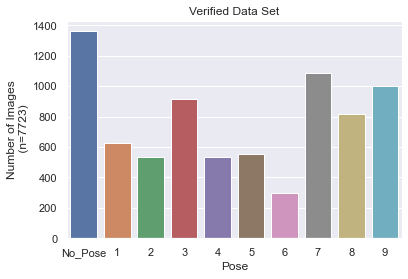

In [178]:
# Visualize number of images per pose
sns.set(style="darkgrid")
ax = sns.countplot(x="Pose", data=df2)
ax.set_xticklabels(['No_Pose', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Verified Data Set')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\n (n={df2.shape[0]})')
plt.show()

In [10]:
sns.set_style("darkgrid")

In [294]:
df2.Pose.value_counts()

0    1361
7    1086
9    1003
3     913
8     816
1     625
5     554
4     536
2     534
6     295
Name: Pose, dtype: int64

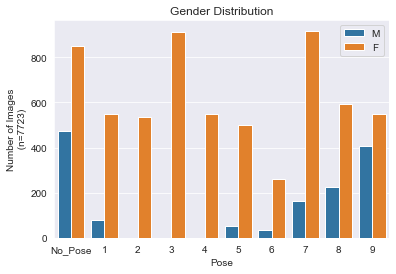

In [11]:
# Visualize gender distribution per pose
ax = sns.countplot(x='Pose', hue='Gender', data=df3)
ax.set_xticklabels(['No_Pose', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Gender Distribution')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\n (n={df2.shape[0]})')
plt.legend()
plt.show()

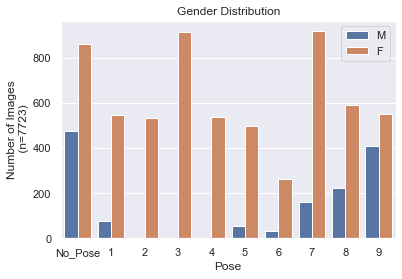

In [182]:
# Visualize gender distribution per pose
ax = sns.countplot(x='Pose', hue='Gender', data=df3)
ax.set_xticklabels(['No_Pose', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Gender Distribution')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\n (n={df2.shape[0]})')
plt.legend()
plt.show()

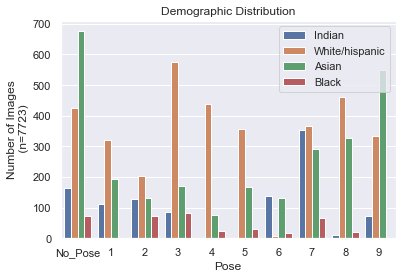

In [183]:
# Visualize gender distribution per pose
ax = sns.countplot(x='Pose', hue='Apparent_Race', data=df3)
ax.set_xticklabels(['No_Pose', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Demographic Distribution')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\n (n={df2.shape[0]})')
plt.legend()
plt.show()

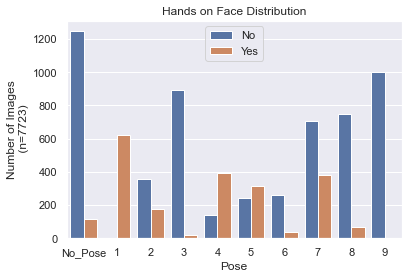

In [184]:
# Images per pose with hands on face
ax = sns.countplot(x="Pose", hue="Hands on Face", data=df2)
ax.set_xticklabels(['No_Pose', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Hands on Face Distribution')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\n (n={df2.shape[0]})')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Yes"])
plt.show()

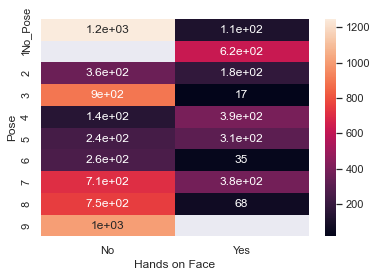

In [191]:
# Another view of hands on face by pose
df3 = df2[['Pose', 'Hands on Face']].copy()
df_heatmap = df3.pivot_table(index='Pose', columns='Hands on Face', aggfunc=len)
ax = sns.heatmap(df_heatmap, annot=True)
ax.set(xlabel='Hands on Face', ylabel='Pose')
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticklabels(['No_Pose', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.show()

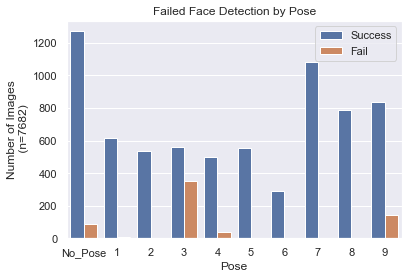

In [192]:
# Plot failed landmarks by pose
ax = sns.countplot(x="Pose", hue="failed", data=df4)
ax.set_xticklabels(['No_Pose', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Failed Face Detection by Pose')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\n (n={landmark_df.shape[0]})')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Success", "Fail"])
plt.show()


In [193]:
print(f"failed images: {df4.failed.sum()}")
print(f"succeeded images: {df3.shape[0]-df4.failed.sum()}")

failed images: 639.0
succeeded images: 7084.0


In [45]:
df4.head()

,Filename,Pose,Face Obstructed,Hands on Face,Notes,Creator,Gender,Apparent_Race,failed
0,Pose_9_Yoga-with-Souvik_317.jpg,0,0,0,NaN,Yoga-with-Souvik,M,Indian,0.0
1,Pose_9_Yoga-with-Souvik_316.jpg,0,0,0,NaN,Yoga-with-Souvik,M,Indian,0.0
2,Pose_9_Yoga-with-Souvik_315.jpg,9,0,0,NaN,Yoga-with-Souvik,M,Indian,0.0
3,Pose_9_Yoga-with-Souvik_314.jpg,0,0,0,NaN,Yoga-with-Souvik,M,Indian,0.0
4,Pose_9_Yoga-with-Souvik_313.jpg,0,0,0,NaN,Yoga-with-Souvik,M,Indian,0.0


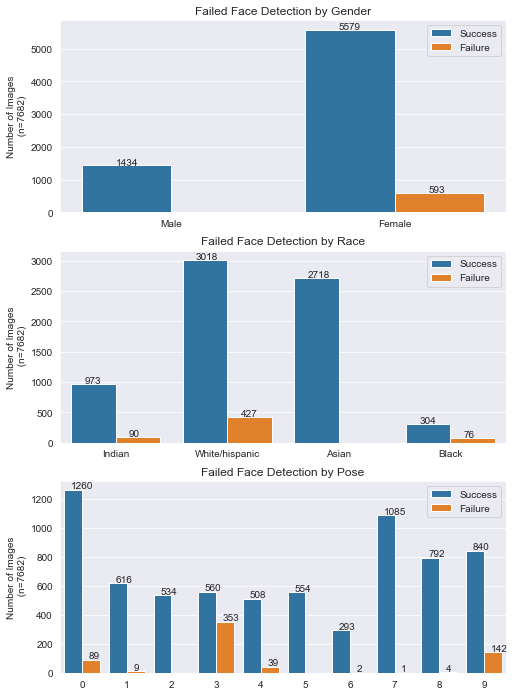

In [54]:
# Make 3 vertical subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plot failed images by gender
sns.countplot(x='Gender', hue='failed', data=df4, ax=ax1)
ax1.set_title('Failed Face Detection by Gender')
ax1.set_xticklabels(['Male', 'Female'])
ax1.set_xlabel('')
ax1.set_ylabel(f'Number of Images\n (n={landmark_df.shape[0]})')
ax1.legend(['Success', 'Failure'])
for p in ax1.patches:
    try:
        num = int(p.get_height())
        ax1.annotate(f'\n{num}', (p.get_x()+0.15, p.get_height()+10))
    except:
        ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+10))

# Plot failed images by race
sns.countplot(x='Apparent_Race', hue='failed', data=df4, ax=ax2)
ax2.set_title('Failed Face Detection by Race')
# ax2.set_xticklabels(['Male', 'Female'])
ax2.set_xlabel('')
ax2.set_ylabel(f'Number of Images\n (n={landmark_df.shape[0]})')
ax2.legend(['Success', 'Failure'])
for p in ax2.patches:
    try:
        num = int(p.get_height())
        ax2.annotate(f'\n{num}', (p.get_x()+0.12, p.get_height()+10))
    except:
        ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+10))

# Plot failed images by pose
sns.countplot(x='Pose', hue='failed', data=df4, ax=ax3)
ax3.set_title('Failed Face Detection by Pose')
# ax3.set_xticklabels(['Frontal', 'Non-frontal'])
ax3.set_xlabel('')
ax3.set_ylabel(f'Number of Images\n (n={landmark_df.shape[0]})')
ax3.legend(['Success', 'Failure'])
for p in ax3.patches:
    try:
        num = int(p.get_height())
        ax3.annotate(f'\n{num}', (p.get_x()+0.15, p.get_height()+10))
    except:
        ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+10))

plt.show()

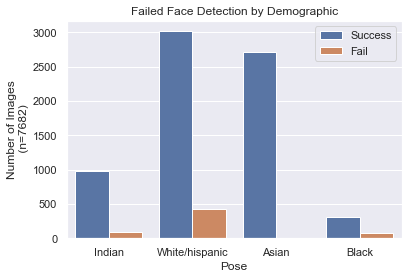

In [195]:
# Get failed landmarks by gender
ax = sns.countplot(x="Apparent_Race", hue="failed", data=df4)
plt.title('Failed Face Detection by Demographic')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\n (n={landmark_df.shape[0]})')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Success", "Fail"])
plt.show()

## TO DELETE

In [264]:
df5.Filename

0       Pose_9_Yoga-with-Souvik_317.jpg
1       Pose_9_Yoga-with-Souvik_316.jpg
2       Pose_9_Yoga-with-Souvik_315.jpg
3       Pose_9_Yoga-with-Souvik_314.jpg
4       Pose_9_Yoga-with-Souvik_313.jpg
                     ...               
7038        Pose_7_IBC-Mangai-R_716.jpg
7039        Pose_7_IBC-Mangai-R_715.jpg
7040        Pose_7_IBC-Mangai-R_714.jpg
7041        Pose_7_IBC-Mangai-R_713.jpg
7042        Pose_7_IBC-Mangai-R_712.jpg
Name: Filename, Length: 7043, dtype: object

In [296]:
features = df5.blendshapes.str.replace('[', '').str.replace(']', '').str.split(',', expand=True).astype(float)
feature_names = {
0:'browDownLeft', 1:'browDownRight', 2:'browInnerUp', 3:'browOuterUpLeft',
4:'browOuterUpRight', 5:'cheekPuff', 6:'cheekSquintLeft', 7:'cheekSquintRight',
8:'eyeBlinkLeft', 9:'eyeBlinkRight', 10:'eyeLookDownLeft', 11:'eyeLookDownRight',
12:'eyeLookInLeft', 13:'eyeLookInRight', 14:'eyeLookOutLeft', 15:'eyeLookOutRight',
16:'eyeLookUpLeft', 17:'eyeLookUpRight', 18:'eyeSquintLeft', 19:'eyeSquintRight',
20:'eyeWideLeft', 21:'eyeWideRight', 22:'jawForward', 23:'jawLeft',
24:'jawOpen', 25:'jawRight', 26:'mouthClose', 27:'mouthDimpleLeft',
28:'mouthDimpleRight', 29:'mouthFrownLeft', 30:'mouthFrownRight',
31:'mouthFunnel', 32:'mouthLeft', 33:'mouthLowerDownLeft',
34:'mouthLowerDownRight', 35:'mouthPressLeft', 36:'mouthPressRight',
37:'mouthPucker', 38:'mouthRight', 39:'mouthRollLower', 40:'mouthRollUpper',
41:'mouthShrugLower', 42:'mouthShrugUpper', 43:'mouthSmileLeft',
44:'mouthSmileRight', 45:'mouthStretchLeft', 46:'mouthStretchRight',
47:'mouthUpperUpLeft', 48:'mouthUpperUpRight', 49:'noseSneerLeft',
50:'noseSneerRight', 51:'tongueOut'
}
features.rename(columns=feature_names, inplace=True)
labels = df5.Pose
uid = df5.Filename
labels2 = pd.get_dummies(labels)
labels2.rename(columns={0.0: 'No_Pose', 1.0:'Pose_1',
                        2.0:'Pose_2', 3.0:'Pose_3',
                        4.0:'Pose_4', 5.0:'Pose_5',
                        6.0:'Pose_6', 7.0:'Pose_7',
                        8.0:'Pose_8', 9.0:'Pose_9'}, inplace=True)
# Combine labels and features
df6 = pd.concat([uid, labels2, features], axis=1)
df6.head()

/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Filename,No_Pose,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,...,mouthShrugUpper,mouthSmileLeft,mouthSmileRight,mouthStretchLeft,mouthStretchRight,mouthUpperUpLeft,mouthUpperUpRight,noseSneerLeft,noseSneerRight,tongueOut
0,Pose_9_Yoga-with-Souvik_317.jpg,1,0,0,0,0,0,0,0,0,...,0.073720,0.034195,0.595930,0.650943,0.001342,0.001020,0.017339,0.036859,0.000003,1.919274e-07
1,Pose_9_Yoga-with-Souvik_316.jpg,1,0,0,0,0,0,0,0,0,...,0.120000,0.044645,0.850602,0.834733,0.007364,0.003293,0.115109,0.165811,0.000003,3.095925e-07
2,Pose_9_Yoga-with-Souvik_315.jpg,0,0,0,0,0,0,0,0,0,...,0.042524,0.092428,0.000591,0.001227,0.000008,0.000037,0.052756,0.057366,0.000005,1.799298e-08
3,Pose_9_Yoga-with-Souvik_314.jpg,1,0,0,0,0,0,0,0,0,...,0.058738,0.034568,0.940028,0.953489,0.045883,0.089023,0.413707,0.491057,0.000005,7.218802e-07
4,Pose_9_Yoga-with-Souvik_313.jpg,1,0,0,0,0,0,0,0,0,...,0.194020,0.108365,0.582395,0.640127,0.001036,0.001061,0.128686,0.191090,0.000004,1.533073e-07


In [ ]:
df5

In [480]:
# Drop rows with NaNs in Pose column
df5.dropna(subset=['Pose'], inplace=True)
df5

,Filename,blendshapes,landmarks,Pose,Face Obstructed,Hands on Face,Notes,Creator,Gender,Apparent_Race
0,Pose_9_Yoga-with-Souvik_317.jpg,"[5.608021069747338e-07, 0.0013631416950374842,...","[(0.5571142435073853, 0.4451383352279663, -0.0...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
1,Pose_9_Yoga-with-Souvik_316.jpg,"[7.196812248366768e-07, 0.002077932935208082, ...","[(0.5588706731796265, 0.440979927778244, -0.02...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
2,Pose_9_Yoga-with-Souvik_315.jpg,"[1.1721351711457828e-07, 0.0010945542016997933...","[(0.5612891912460327, 0.42788931727409363, -0....",9.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
3,Pose_9_Yoga-with-Souvik_314.jpg,"[1.4378076684806729e-06, 0.022128582000732422,...","[(0.5560778379440308, 0.43858107924461365, -0....",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
4,Pose_9_Yoga-with-Souvik_313.jpg,"[5.819963462272426e-07, 0.007496405392885208, ...","[(0.560219943523407, 0.433199405670166, -0.028...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
...,...,...,...,...,...,...,...,...,...,...
7038,Pose_7_IBC-Mangai-R_716.jpg,"[2.008476087667077e-07, 0.008406941778957844, ...","[(0.5636968612670898, 0.2905597686767578, -0.0...",7.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian
7039,Pose_7_IBC-Mangai-R_715.jpg,"[2.721864120758255e-07, 0.013010706752538681, ...","[(0.5631879568099976, 0.29456180334091187, -0....",7.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian
7040,Pose_7_IBC-Mangai-R_714.jpg,"[5.402328611125995e-07, 0.04961061850190163, 0...","[(0.5157248973846436, 0.294583797454834, -0.02...",0.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian
7041,Pose_7_IBC-Mangai-R_713.jpg,"[4.1999101085821167e-07, 0.05145494267344475, ...","[(0.5022276043891907, 0.29479217529296875, -0....",0.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian


In [269]:
# Correlation of df6
corr = df6.drop('Filename', axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')


,No_Pose,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,Pose_9,browDownLeft,browDownRight,browInnerUp,browOuterUpLeft,browOuterUpRight,cheekPuff,cheekSquintLeft,cheekSquintRight,eyeBlinkLeft,eyeBlinkRight,eyeLookDownLeft,eyeLookDownRight,eyeLookInLeft,eyeLookInRight,eyeLookOutLeft,eyeLookOutRight,eyeLookUpLeft,eyeLookUpRight,eyeSquintLeft,eyeSquintRight,eyeWideLeft,eyeWideRight,jawForward,jawLeft,jawOpen,jawRight,mouthClose,mouthDimpleLeft,mouthDimpleRight,mouthFrownLeft,mouthFrownRight,mouthFunnel,mouthLeft,mouthLowerDownLeft,mouthLowerDownRight,mouthPressLeft,mouthPressRight,mouthPucker,mouthRight,mouthRollLower,mouthRollUpper,mouthShrugLower,mouthShrugUpper,mouthSmileLeft,mouthSmileRight,mouthStretchLeft,mouthStretchRight,mouthUpperUpLeft,mouthUpperUpRight,noseSneerLeft,noseSneerRight,tongueOut
No_Pose,1.000000,-0.145346,-0.134472,-0.137983,-0.129362,-0.137178,-0.097814,-0.200347,-0.166992,-0.172765,-0.001496,0.040016,0.079266,-0.080209,-0.155687,-0.162408,0.129575,0.037571,0.035819,0.018724,0.025014,0.005673,0.017780,-0.005193,-0.002267,-0.009157,-0.013655,-0.100859,-0.110766,0.107390,-0.005050,-0.114638,-0.154287,0.271945,-0.083180,-0.165006,-0.060499,-0.105244,-0.169006,-0.197553,-0.057947,-0.055829,-0.155439,-0.098494,0.099549,0.137704,-0.065948,-0.037217,-0.223507,-0.093047,-0.150606,-0.175786,-0.099870,-0.061505,0.360458,0.339919,0.012074,0.108290,0.331509,0.331950,0.010186,0.145808
Pose_1,-0.145346,1.000000,-0.088675,-0.090990,-0.085305,-0.090459,-0.064501,-0.132115,-0.110120,-0.113927,-0.049246,-0.061143,-0.022203,0.242052,0.190911,0.170545,-0.101463,-0.040503,-0.011444,0.080933,0.081272,0.078428,0.086050,0.002552,-0.113276,-0.123869,-0.010685,0.060942,0.065211,0.047653,-0.033930,0.261374,0.139790,-0.100081,-0.066258,-0.081723,-0.046796,-0.034794,-0.116282,-0.139509,-0.070157,-0.069760,-0.123703,-0.082277,-0.124662,-0.125539,-0.091155,-0.049455,0.011368,-0.066195,-0.006565,-0.103175,-0.076473,-0.082778,-0.077559,-0.063064,-0.083358,-0.074929,-0.100107,-0.099030,-0.061564,-0.107252
Pose_2,-0.134472,-0.088675,1.000000,-0.084182,-0.078923,-0.083691,-0.059675,-0.122230,-0.101881,-0.105403,-0.026057,-0.073022,-0.067594,0.058614,0.088088,0.094027,0.661121,0.632987,0.283171,0.153651,0.144937,0.117626,0.117375,-0.013533,0.132719,0.080937,-0.057803,-0.078416,-0.060855,0.048892,0.030576,-0.062329,-0.042480,0.454071,0.173392,0.228659,0.163553,-0.105362,-0.114393,-0.117922,0.234764,0.198968,0.069263,-0.090951,0.703037,0.705250,-0.117232,-0.118585,-0.217087,-0.073193,-0.117274,-0.159356,-0.124744,-0.041225,0.328515,0.322572,0.627256,0.457071,0.388836,0.393859,0.401834,0.428939
Pose_3,-0.137983,-0.090990,-0.084182,1.000000,-0.080983,-0.085876,-0.061233,-0.125421,-0.104541,-0.108155,0.126248,0.329007,-0.025326,-0.050330,-0.028992,0.227521,-0.150978,-0.063669,-0.120494,0.030891,-0.015101,0.200351,0.174561,-0.140447,0.325053,0.361159,-0.111071,-0.173442,-0.137273,-0.382406,-0.176303,0.063409,0.138972,-0.128993,-0.067531,-0.207736,-0.048959,-0.101039,-0.147711,-0.145641,0.297481,0.333477,-0.125142,-0.071426,-0.132437,-0.137224,-0.010703,-0.041220,-0.126434,-0.001278,-0.116705,-0.165465,0.672038,0.627194,-0.104988,-0.102928,-0.041802,-0.025929,0.019328,0.009438,0.066775,0.000722
Pose_4,-0.129362,-0.085305,-0.078923,-0.080983,1.000000,-0.080511,-0.057408,-0.117586,-0.098010,-0.101398,-0.008145,-0.075774,-0.066256,0.122434,0.100263,0.058148,0.066323,-0.077680,0.046122,-0.058543,-0.061404,-0.144638,-0.147043,0.042988,-0.083118,-0.090200,0.026028,0.198004,0.233863,0.070149,0.151661,-0.045246,0.086317,0.084311,0.035659,0.235858,-0.035699,0.404689,0.170825,0.101973,-0.061668,-0.061588,-0.118429,-0.061030,-0.033923,-0.034216,0.125257,0.164273,-0.168745,-0.066389,-0.082295,-0.037457,-0.117404,-0.097850,-0.031474,-0.010648,-0.063539,0.029065,-0.107572,-0.108930,-0.103661,-0.055463
Pose_5,-0.137178,-0.090459,-0.083691,-0.085876,-0.080511,1.000000,-0.060876,-0.124690,-0.103931,-0.107524,0.284374,-0.035365,0.010763,-0.143899,-0.151271,-0

In [297]:
# Make a random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Format data into np arrays
# Labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_encoded_categorical = to_categorical(labels_encoded)

# Features
features_np = np.array(features)

In [462]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded_categorical, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))}")
print(f"Classification Report: \n{classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))}")



Accuracy: 0.8261178140525195
Confusion Matrix: 
[[229   0   4   1   1   0   0   6   2   8]
 [ 32  90   0   0   3   0   0   0   8   0]
 [ 10   0 112   0   0   0   0   0   0   0]
 [  7   0   0  95   0   0   0   0   0   0]
 [ 16   0   0   0  86   2   0   0   0   0]
 [  6   0   0   0   1 100   0   0   0   0]
 [ 15   0   0   0   0   0  39   1   0   0]
 [ 27   0   0   0   0   0   0 182   0   0]
 [ 14   0   0   0   0   0   0   0 129   2]
 [ 20   0   0   0   0   0   0   1   0 160]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.91      0.73       251
           1       1.00      0.68      0.81       133
           2       0.97      0.92      0.94       122
           3       0.99      0.93      0.96       102
           4       0.95      0.83      0.88       104
           5       0.98      0.93      0.96       107
           6       1.00      0.71      0.83        55
           7       0.96      0.87      0.91       209
          

In [326]:
# Get count of each pose grouped by creator
d = df5.groupby(['Creator', 'Pose']).count()
d.reset_index(inplace=True)


In [335]:
d

,Creator,Pose,Filename,blendshapes,landmarks,Face Obstructed,Hands on Face,Notes,Gender,Apparent_Race
0,AVA-LEE,0.0,81,81,81,81,81,3,81,81
1,AVA-LEE,1.0,52,52,52,52,52,0,52,52
2,AVA-LEE,2.0,90,90,90,90,90,0,90,90
3,AVA-LEE,5.0,46,46,46,46,46,10,46,46
4,AVA-LEE,7.0,58,58,58,58,58,0,58,58
...,...,...,...,...,...,...,...,...,...,...
147,thefaceyogalab,0.0,8,8,8,8,8,0,8,8
148,thefaceyogalab,1.0,27,27,27,27,27,0,27,27
149,thefaceyogalab,4.0,16,16,16,16,16,0,16,16
150,thefaceyogalab,8.0,39,39,39,39,39,0,39,39


In [372]:
d2 = d.pivot(index='Creator', columns='Pose', values='Filename')
# Add sum column
d2['sum'] = d2.sum(axis=1)
d2
# Add sum row
# d2.loc['sum'] = d2.sum(axis=0)
# Merge gender and race columns from creator df to d2
d3 = d2.merge(creator_df, on='Creator', how='left')
# d3.to_csv('d3.csv')


In [409]:
test = d3.sample(n=11, replace=False)
train = d3[~d3.index.isin(test.index)]

<AxesSubplot:>

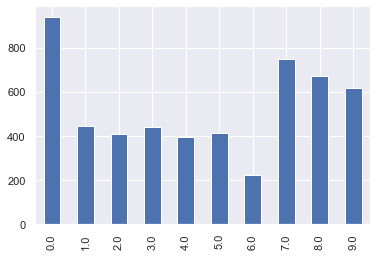

In [424]:
# Sum of each pose
train_opt1[[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]].sum(axis=0).plot(kind='bar')

<AxesSubplot:>

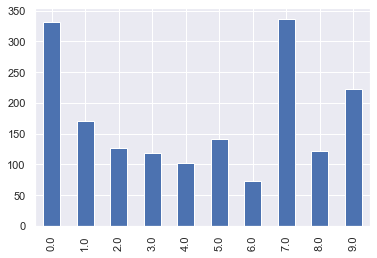

In [425]:
# Sum of each pose
test_opt1[[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]].sum(axis=0).plot(kind='bar')

In [419]:
train_opt1 = train.Creator.tolist()

In [420]:
test_opt1 = test.Creator.tolist()

In [423]:
creator_to_move_to_train = 'Accents-Way-English'
creator_to_move_to_test = 'Shanthi-Kasiraj'
train_opt1.remove(creator_to_move_to_test)
train_opt1.append(creator_to_move_to_train)
test_opt1.remove(creator_to_move_to_train)
test_opt1.append(creator_to_move_to_test)

# Divide d3 by creator into train and test sets
train_opt1 = d3[d3.Creator.isin(train_opt1)]
test_opt1 = d3[d3.Creator.isin(test_opt1)]


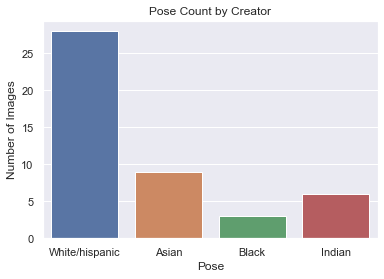

In [426]:
# Plot count of each pose column
order = ['White/hispanic', 'Asian', 'Black', 'Indian']
ax = sns.countplot(x='Apparent_Race', data=train_opt1, order=order)
plt.title('Pose Count by Creator')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images')
plt.show()

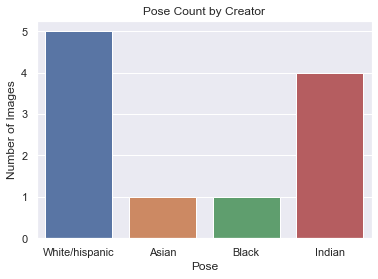

In [427]:
# Plot count of each pose column
ax = sns.countplot(x='Apparent_Race', data=test_opt1, order=order)
plt.title('Pose Count by Creator')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images')
plt.show()

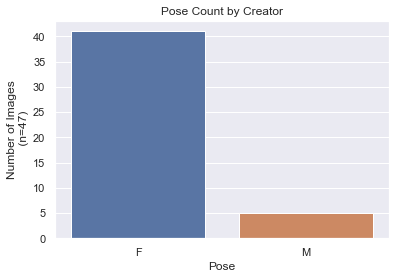

In [429]:
# Plot count of each pose column
ax = sns.countplot(x='Gender', data=train_opt1)
plt.title('Pose Count by Creator')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\n (n={train_opt1.shape[0]})')
plt.show()


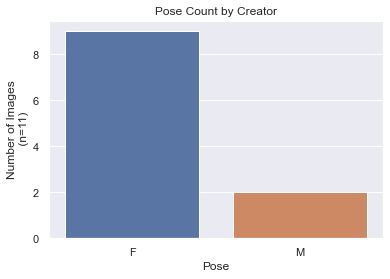

In [428]:
# Plot count of each pose column
ax = sns.countplot(x='Gender', data=test_opt1)
plt.title('Pose Count by Creator')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\n (n={test.shape[0]})')
plt.show()


In [430]:
df6.head()

,Filename,No_Pose,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,...,mouthShrugUpper,mouthSmileLeft,mouthSmileRight,mouthStretchLeft,mouthStretchRight,mouthUpperUpLeft,mouthUpperUpRight,noseSneerLeft,noseSneerRight,tongueOut
0,Pose_9_Yoga-with-Souvik_317.jpg,1,0,0,0,0,0,0,0,0,...,0.073720,0.034195,0.595930,0.650943,0.001342,0.001020,0.017339,0.036859,0.000003,1.919274e-07
1,Pose_9_Yoga-with-Souvik_316.jpg,1,0,0,0,0,0,0,0,0,...,0.120000,0.044645,0.850602,0.834733,0.007364,0.003293,0.115109,0.165811,0.000003,3.095925e-07
2,Pose_9_Yoga-with-Souvik_315.jpg,0,0,0,0,0,0,0,0,0,...,0.042524,0.092428,0.000591,0.001227,0.000008,0.000037,0.052756,0.057366,0.000005,1.799298e-08
3,Pose_9_Yoga-with-Souvik_314.jpg,1,0,0,0,0,0,0,0,0,...,0.058738,0.034568,0.940028,0.953489,0.045883,0.089023,0.413707,0.491057,0.000005,7.218802e-07
4,Pose_9_Yoga-with-Souvik_313.jpg,1,0,0,0,0,0,0,0,0,...,0.194020,0.108365,0.582395,0.640127,0.001036,0.001061,0.128686,0.191090,0.000004,1.533073e-07


In [431]:
df6

,Filename,No_Pose,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,...,mouthShrugUpper,mouthSmileLeft,mouthSmileRight,mouthStretchLeft,mouthStretchRight,mouthUpperUpLeft,mouthUpperUpRight,noseSneerLeft,noseSneerRight,tongueOut
0,Pose_9_Yoga-with-Souvik_317.jpg,1,0,0,0,0,0,0,0,0,...,0.073720,0.034195,5.959297e-01,0.650943,1.341935e-03,0.001020,0.017339,0.036859,0.000003,1.919274e-07
1,Pose_9_Yoga-with-Souvik_316.jpg,1,0,0,0,0,0,0,0,0,...,0.120000,0.044645,8.506021e-01,0.834733,7.364362e-03,0.003293,0.115109,0.165811,0.000003,3.095925e-07
2,Pose_9_Yoga-with-Souvik_315.jpg,0,0,0,0,0,0,0,0,0,...,0.042524,0.092428,5.909131e-04,0.001227,7.828264e-06,0.000037,0.052756,0.057366,0.000005,1.799298e-08
3,Pose_9_Yoga-with-Souvik_314.jpg,1,0,0,0,0,0,0,0,0,...,0.058738,0.034568,9.400277e-01,0.953489,4.588252e-02,0.089023,0.413707,0.491057,0.000005,7.218802e-07
4,Pose_9_Yoga-with-Souvik_313.jpg,1,0,0,0,0,0,0,0,0,...,0.194020,0.108365,5.823946e-01,0.640127,1.036389e-03,0.001061,0.128686,0.191090,0.000004,1.533073e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Pose_7_IBC-Mangai-R_716.jpg,0,0,0,0,0,0,0,1,0,...,0.007340,0.006585,3.804307e-06,0.000006,3.132524e-07,0.000020,0.000067,0.000066,0.000003,3.262976e-08
7039,Pose_7_IBC-Mangai-R_715.jpg,0,0,0,0,0,0,0,1,0,...,0.006990,0.004251,9.890623e-07,0.000001,2.642251e-07,0.000022,0.000035,0.000025,0.000003,4.515650e-08
7040,Pose_7_IBC-Mangai-R_714.jpg,1,0,0,0,0,0,0,0,0,...,0.010717,0.009644,6.957617e-06,0.000008,4.896841e-06,0.004702,0.000059,0.000023,0.000010,2.097567e-07
7041,Pose_7_IBC-Mangai-R_713.jpg,1,0,0,0,0,0,0,0,0,...,0.011247,0.016096,1.008076e-04,0.000110,8.099391e-05,0.006634,0.000078,0.000029,0.000014,3.453629e-07


In [439]:
features = df5.blendshapes.str.replace('[', '').str.replace(']', '').str.split(',', expand=True).astype(float)
feature_names = {
0:'browDownLeft', 1:'browDownRight', 2:'browInnerUp', 3:'browOuterUpLeft',
4:'browOuterUpRight', 5:'cheekPuff', 6:'cheekSquintLeft', 7:'cheekSquintRight',
8:'eyeBlinkLeft', 9:'eyeBlinkRight', 10:'eyeLookDownLeft', 11:'eyeLookDownRight',
12:'eyeLookInLeft', 13:'eyeLookInRight', 14:'eyeLookOutLeft', 15:'eyeLookOutRight',
16:'eyeLookUpLeft', 17:'eyeLookUpRight', 18:'eyeSquintLeft', 19:'eyeSquintRight',
20:'eyeWideLeft', 21:'eyeWideRight', 22:'jawForward', 23:'jawLeft',
24:'jawOpen', 25:'jawRight', 26:'mouthClose', 27:'mouthDimpleLeft',
28:'mouthDimpleRight', 29:'mouthFrownLeft', 30:'mouthFrownRight',
31:'mouthFunnel', 32:'mouthLeft', 33:'mouthLowerDownLeft',
34:'mouthLowerDownRight', 35:'mouthPressLeft', 36:'mouthPressRight',
37:'mouthPucker', 38:'mouthRight', 39:'mouthRollLower', 40:'mouthRollUpper',
41:'mouthShrugLower', 42:'mouthShrugUpper', 43:'mouthSmileLeft',
44:'mouthSmileRight', 45:'mouthStretchLeft', 46:'mouthStretchRight',
47:'mouthUpperUpLeft', 48:'mouthUpperUpRight', 49:'noseSneerLeft',
50:'noseSneerRight', 51:'tongueOut'
}
features.rename(columns=feature_names, inplace=True)
labels = df5.Pose
uid = df5.Filename
labels2 = pd.get_dummies(labels)
labels2.rename(columns={0.0: 'No_Pose', 1.0:'Pose_1',
                        2.0:'Pose_2', 3.0:'Pose_3',
                        4.0:'Pose_4', 5.0:'Pose_5',
                        6.0:'Pose_6', 7.0:'Pose_7',
                        8.0:'Pose_8', 9.0:'Pose_9'}, inplace=True)
# Combine labels and features
df_labels = pd.concat([uid, labels], axis=1)
df_feature = pd.concat([uid, features], axis=1)


/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [479]:
test_opt1.Creator.tolist()

['Anna-Veronika',
 'Blush-with-me-Parmita',
 'Doctora-Claudia-Garcia',
 'Gesund-durchs-Leben',
 'Goldbeauty',
 'Muscle-Watching-L',
 'Natty',
 'Pilates-by-Lisa',
 'Shanthi-Kasiraj',
 'Siddhi-yoga-hindi',
 'templo-del-masaje']

In [454]:
df_labels['creator'] = df_labels.Filename.str.split('_').str[2]
df_feature['creator'] = df_feature.Filename.str.split('_').str[2]

df_labels_train = df_labels[df_labels.creator.isin(train_opt1.Creator.tolist())]
df_labels_test = df_labels[df_labels.creator.isin(test_opt1.Creator.tolist())]
df_feature_train = df_feature[df_feature.creator.isin(train_opt1.Creator.tolist())]
df_feature_test = df_feature[df_feature.creator.isin(test_opt1.Creator.tolist())]

labels_train = df_labels_train.Pose
labels_test = df_labels_test.Pose
label_encoder = LabelEncoder()
labels_train = label_encoder.fit_transform(labels_train)
labels_test = label_encoder.fit_transform(labels_test)
labels_train_cat = to_categorical(labels_train)
labels_test_cat = to_categorical(labels_test)

features_train = np.array(df_feature_train.drop(['Filename', 'creator'], axis=1))
features_test = np.array(df_feature_test.drop(['Filename', 'creator'], axis=1))


In [494]:
len(labels_train)

5294

In [457]:
from sklearn.naive_bayes import GaussianNB
# Train model
classifier = GaussianNB()
classifier.fit(features_train, labels_train)

# Evaluate model
y_pred = classifier.predict(features_test)
print(f"Accuracy: {accuracy_score(labels_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(labels_test, y_pred)}")
print(f"Classification Report: \n{classification_report(labels_test, y_pred)}")

Accuracy: 0.45423340961098396
Confusion Matrix: 
[[161  23  66  10   3   4  21  15   3  26]
 [  0  16   0   0   0   0  37 118   0   0]
 [  6   0 117   0   0   0   0   0   4   0]
 [  1   4   0 107   0   0   0   7   0   0]
 [  4  44   0   2  27   5   2   1  13   5]
 [  3   9   0   1   0 113  12   3   0   1]
 [  3   0   0   0   0   0  21  15   0  34]
 [ 34   9   0  12   3   1  87 148   0  43]
 [ 19   0   0   0   4   0  27   1  69   2]
 [  5  13   2   0   0   0 168  19   0  15]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.48      0.57       332
           1       0.14      0.09      0.11       171
           2       0.63      0.92      0.75       127
           3       0.81      0.90      0.85       119
           4       0.73      0.26      0.39       103
           5       0.92      0.80      0.85       142
           6       0.06      0.29      0.09        73
           7       0.45      0.44      0.45       337
         

In [477]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded, test_size=0.2, random_state=42)

# Train model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Evaluate model
y_pred = classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")


Accuracy: 0.5699077359829666
Confusion Matrix: 
[[104  24  22   6  12   6  25  35   3  14]
 [  3  38   2   0   6  22  11  40  11   0]
 [  2   0 118   0   0   0   0   0   2   0]
 [  0   1   0  69   0   0   1  31   0   0]
 [  4   7   1   0  87   2   3   0   0   0]
 [  0   0   0   0   1 104   1   1   0   0]
 [  0   0   0   0   0   0  49   6   0   0]
 [  3   3   0   7   0  17  71 108   0   0]
 [  5   4   9   0  16   0  34   0  76   1]
 [  3   0   0   4   0   0  99  24   1  50]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.41      0.55       251
           1       0.49      0.29      0.36       133
           2       0.78      0.97      0.86       122
           3       0.80      0.68      0.73       102
           4       0.71      0.84      0.77       104
           5       0.69      0.97      0.81       107
           6       0.17      0.89      0.28        55
           7       0.44      0.52      0.48       209
          

In [469]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded, test_size=0.2, random_state=42)

# Train model
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Evaluate model
y_pred = classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 0.8218594748048261
Confusion Matrix: 
[[167  20   8   5   3   1   1  20   6  20]
 [ 16  85   1   0   2   0   1   5  11  12]
 [  5   0 116   0   0   0   0   0   1   0]
 [  1   1   0  97   0   1   0   2   0   0]
 [  4   3   1   0  83   3   0   0   8   2]
 [  3   1   0   0   2 101   0   0   0   0]
 [  0   0   0   0   1   0  37  12   0   5]
 [  7   7   0   3   0   0   4 183   0   5]
 [  0   5   1   0   3   0   2   0 131   3]
 [  4   2   0   4   0   0   7   6   0 158]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       251
           1       0.69      0.64      0.66       133
           2       0.91      0.95      0.93       122
           3       0.89      0.95      0.92       102
           4       0.88      0.80      0.84       104
           5       0.95      0.94      0.95       107
           6       0.71      0.67      0.69        55
           7       0.80      0.88      0.84       209
          

In [464]:
from sklearn.linear_model import LogisticRegression
# Train model
classifier = LogisticRegression(max_iter=1000)
classifier.fit(features_train, labels_train)

# Evaluate model
y_pred = classifier.predict(features_test)
print(f"Accuracy: {accuracy_score(labels_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(labels_test, y_pred)}")
print(f"Classification Report: \n{classification_report(labels_test, y_pred)}")


Accuracy: 0.7053775743707094
Confusion Matrix: 
[[249   1  27  11   0   1   0  27   1  15]
 [ 41  66   0  13   0   0   0  51   0   0]
 [  4   0 102   0   0   0   0   0  21   0]
 [ 10   0   0 107   0   1   0   1   0   0]
 [  6  40   0   2  48   7   0   0   0   0]
 [  3   0   0   3   0 135   1   0   0   0]
 [  1   0   0   0   0   0  31  41   0   0]
 [ 13  10   0  46   0   0  24 224   0  20]
 [  5   0   3   0   0   0   4   0 106   4]
 [  5   0   1   1   0   0  17  32   1 165]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       332
           1       0.56      0.39      0.46       171
           2       0.77      0.80      0.78       127
           3       0.58      0.90      0.71       119
           4       1.00      0.47      0.64       103
           5       0.94      0.95      0.94       142
           6       0.40      0.42      0.41        73
           7       0.60      0.66      0.63       337
          

In [465]:
# Train model
rf = RandomForestClassifier(n_estimators=500, max_depth=10)
rf.fit(features_train, labels_train)

# Evaluate model
y_pred = rf.predict(features_test)
print(f"Accuracy: {accuracy_score(labels_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(labels_test, y_pred)}")
print(f"Classification Report: \n{classification_report(labels_test, y_pred)}")

Accuracy: 0.652745995423341
Confusion Matrix: 
[[291   0  12   3   0   0   1  16   1   8]
 [  2   0   0   0   0   0   0 169   0   0]
 [  5   0 118   0   0   0   0   0   4   0]
 [ 25   0   0  94   0   0   0   0   0   0]
 [ 50  11   0   0  33   5   0   1   3   0]
 [  0   0   0   0   0 132   0  10   0   0]
 [  1   0   0   0   0   0  33  22   0  17]
 [125   5   0  13   0   0   1 150   0  43]
 [  9   0   0   0   0   0   3   0 106   4]
 [ 11   0   0   0   0   0  15  12   0 184]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.56      0.88      0.68       332
           1       0.00      0.00      0.00       171
           2       0.91      0.93      0.92       127
           3       0.85      0.79      0.82       119
           4       1.00      0.32      0.49       103
           5       0.96      0.93      0.95       142
           6       0.62      0.45      0.52        73
           7       0.39      0.45      0.42       337
           

In [490]:
c = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), output_dict=True)

In [493]:

c.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'accuracy', 'macro avg', 'weighted avg'])

In [482]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded_categorical, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))}")
print(f"Classification Report: \n{classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))}")

Accuracy: 0.8261178140525195
Confusion Matrix: 
[[229   0   4   1   1   0   0   6   2   8]
 [ 32  90   0   0   3   0   0   0   8   0]
 [ 10   0 112   0   0   0   0   0   0   0]
 [  7   0   0  95   0   0   0   0   0   0]
 [ 16   0   0   0  86   2   0   0   0   0]
 [  6   0   0   0   1 100   0   0   0   0]
 [ 15   0   0   0   0   0  39   1   0   0]
 [ 27   0   0   0   0   0   0 182   0   0]
 [ 14   0   0   0   0   0   0   0 129   2]
 [ 20   0   0   0   0   0   0   1   0 160]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.91      0.73       251
           1       1.00      0.68      0.81       133
           2       0.97      0.92      0.94       122
           3       0.99      0.93      0.96       102
           4       0.95      0.83      0.88       104
           5       0.98      0.93      0.96       107
           6       1.00      0.71      0.83        55
           7       0.96      0.87      0.91       209
          

# Make model2_results.csv
filename (landmarks2.csv),
blendshapes (landmarks2.csv),
landmarks (landmarks2.csv),
Pose (df5),
Face Obstructed (df5),
Hands on Face (df5),
Notes (df5),
Creator (from filename),
Gender (df5) ,
Apparent_Race (df5)

merge columns needed: 
- original filename for Data Verification merge
- Creator


In [496]:
df5.columns

Index(['Filename', 'blendshapes', 'landmarks', 'Pose', 'Face Obstructed',
       'Hands on Face', 'Notes', 'Creator', 'Gender', 'Apparent_Race'],
      dtype='object')

In [500]:
landmark2_df = pd.read_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/landmarks2.csv')
landmark2_df.columns

Index(['Unnamed: 0', 'landmarks', 'filename', 'blendshapes'], dtype='object')

In [502]:
landmark2_df.head()

,Unnamed: 0,landmarks,filename,blendshapes
0,0,"[(0.5354241728782654, 0.3942164480686188, -0.0...",aug-Pose_2_Face-Yoga-Method_416.jpg,"[7.1687679792376e-07, 0.0015940895536914468, 0..."
1,1,"[(0.46912822127342224, 0.2676655948162079, -0....",zoom-Pose_2_Face-Yoga-Method_416.jpg,"[9.191711001221847e-07, 0.0002983348094858229,..."
2,2,"[(0.4749401807785034, 0.40972456336021423, -0....",shear-Pose_2_Face-Yoga-Method_416.jpg,"[4.570634928313666e-07, 0.0008711821283213794,..."
3,3,"[(0.4661442041397095, 0.2637966573238373, -0.0...",zoom-Pose_2_Face-Yoga-Method_417.jpg,"[1.2624046803466626e-06, 0.0002172658132622018..."
4,4,"[(0.5249334573745728, 0.3435852825641632, -0.0...",flip-Pose_2_Face-Yoga-Method_415.jpg,"[5.646483600685315e-07, 0.0006009486387483776,..."


In [505]:
# Get OG filename for merging
landmark2_df['Filename'] = landmark2_df.filename.str.split("-", n=1).str[1]

In [508]:
# Join df5 to landmark2 on Filename
landmark2_df = landmark2_df.merge(df5[['Filename', 'Pose', 'Face Obstructed',
       'Hands on Face', 'Notes', 'Creator', 'Gender', 'Apparent_Race']], on='Filename', how='left')

In [510]:
landmark2_df.drop(['Filename', 'Unnamed: 0'], axis=1, inplace=True)

In [515]:
# Drop rows where landmarks == 'Failed'
landmark2_df = landmark2_df[landmark2_df.landmarks != 'Failed']
# Drop rows where Pose is null
landmark2_df = landmark2_df[landmark2_df.Pose.notnull()]


,landmarks,filename,blendshapes,Pose,Face Obstructed,Hands on Face,Notes,Creator,Gender,Apparent_Race
0,"[(0.5354241728782654, 0.3942164480686188, -0.0...",aug-Pose_2_Face-Yoga-Method_416.jpg,"[7.1687679792376e-07, 0.0015940895536914468, 0...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
1,"[(0.46912822127342224, 0.2676655948162079, -0....",zoom-Pose_2_Face-Yoga-Method_416.jpg,"[9.191711001221847e-07, 0.0002983348094858229,...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
2,"[(0.4749401807785034, 0.40972456336021423, -0....",shear-Pose_2_Face-Yoga-Method_416.jpg,"[4.570634928313666e-07, 0.0008711821283213794,...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
3,"[(0.4661442041397095, 0.2637966573238373, -0.0...",zoom-Pose_2_Face-Yoga-Method_417.jpg,"[1.2624046803466626e-06, 0.0002172658132622018...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
4,"[(0.5249334573745728, 0.3435852825641632, -0.0...",flip-Pose_2_Face-Yoga-Method_415.jpg,"[5.646483600685315e-07, 0.0006009486387483776,...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
...,...,...,...,...,...,...,...,...,...,...
21175,"[(0.40476465225219727, 0.48303595185279846, -0...",aug-Pose_9_Yoga-with-Souvik_274.jpg,"[4.4669172893918585e-06, 0.09055650979280472, ...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
21176,"[(0.4325137138366699, 0.41767239570617676, -0....",flip-Pose_9_Yoga-with-Souvik_273.jpg,"[2.0062573469203926e-07, 0.0003592638822738081...",9.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
21177,"[(0.5657152533531189, 0.5192238688468933, -0.0...",shear-Pose_9_Yoga-with-Souvik_273.jpg,"[1.053086577940121e-07, 0.0013209376484155655,...",9.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
21178,"[(0.5987871289253235, 0.37937408685684204, -0....",zoom-Pose_9_Yoga-with-Souvik_273.jpg,"[1.7026953003096423e-07, 0.0010781226446852088...",9.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian


In [516]:
landmark2_df.rename(columns={'filename': 'Filename'}, inplace=True)

In [524]:
cols = landmark2_df.columns.tolist()
cols = cols[1:3] + cols[0:1] + cols[3:]
landmark2_df = landmark2_df[cols]
landmark2_df.head()

,Filename,blendshapes,landmarks,Pose,Face Obstructed,Hands on Face,Notes,Creator,Gender,Apparent_Race
0,aug-Pose_2_Face-Yoga-Method_416.jpg,"[7.1687679792376e-07, 0.0015940895536914468, 0...","[(0.5354241728782654, 0.3942164480686188, -0.0...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
1,zoom-Pose_2_Face-Yoga-Method_416.jpg,"[9.191711001221847e-07, 0.0002983348094858229,...","[(0.46912822127342224, 0.2676655948162079, -0....",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
2,shear-Pose_2_Face-Yoga-Method_416.jpg,"[4.570634928313666e-07, 0.0008711821283213794,...","[(0.4749401807785034, 0.40972456336021423, -0....",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
3,zoom-Pose_2_Face-Yoga-Method_417.jpg,"[1.2624046803466626e-06, 0.0002172658132622018...","[(0.4661442041397095, 0.2637966573238373, -0.0...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
4,flip-Pose_2_Face-Yoga-Method_415.jpg,"[5.646483600685315e-07, 0.0006009486387483776,...","[(0.5249334573745728, 0.3435852825641632, -0.0...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian


In [525]:
landmark2_df.to_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/augmented_model1_results.csv', index=False)

In [529]:
df5

,Filename,blendshapes,landmarks,Pose,Face Obstructed,Hands on Face,Notes,Creator,Gender,Apparent_Race
0,og_Pose_9_Yoga-with-Souvik_317.jpg,"[5.608021069747338e-07, 0.0013631416950374842,...","[(0.5571142435073853, 0.4451383352279663, -0.0...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
1,og_Pose_9_Yoga-with-Souvik_316.jpg,"[7.196812248366768e-07, 0.002077932935208082, ...","[(0.5588706731796265, 0.440979927778244, -0.02...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
2,og_Pose_9_Yoga-with-Souvik_315.jpg,"[1.1721351711457828e-07, 0.0010945542016997933...","[(0.5612891912460327, 0.42788931727409363, -0....",9.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
3,og_Pose_9_Yoga-with-Souvik_314.jpg,"[1.4378076684806729e-06, 0.022128582000732422,...","[(0.5560778379440308, 0.43858107924461365, -0....",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
4,og_Pose_9_Yoga-with-Souvik_313.jpg,"[5.819963462272426e-07, 0.007496405392885208, ...","[(0.560219943523407, 0.433199405670166, -0.028...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
...,...,...,...,...,...,...,...,...,...,...
7038,og_Pose_7_IBC-Mangai-R_716.jpg,"[2.008476087667077e-07, 0.008406941778957844, ...","[(0.5636968612670898, 0.2905597686767578, -0.0...",7.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian
7039,og_Pose_7_IBC-Mangai-R_715.jpg,"[2.721864120758255e-07, 0.013010706752538681, ...","[(0.5631879568099976, 0.29456180334091187, -0....",7.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian
7040,og_Pose_7_IBC-Mangai-R_714.jpg,"[5.402328611125995e-07, 0.04961061850190163, 0...","[(0.5157248973846436, 0.294583797454834, -0.02...",0.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian
7041,og_Pose_7_IBC-Mangai-R_713.jpg,"[4.1999101085821167e-07, 0.05145494267344475, ...","[(0.5022276043891907, 0.29479217529296875, -0....",0.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian


In [532]:
# Add prefix to all filenames in Filename column
df5['Filename'] = df5['Filename'].apply(lambda x: 'og-' + x)

# Remove prefix from all filenames in Filename column
# df5['Filename'] = df5['Filename'].apply(lambda x: x[3:])

In [531]:
df5.head()

,Filename,blendshapes,landmarks,Pose,Face Obstructed,Hands on Face,Notes,Creator,Gender,Apparent_Race
0,Pose_9_Yoga-with-Souvik_317.jpg,"[5.608021069747338e-07, 0.0013631416950374842,...","[(0.5571142435073853, 0.4451383352279663, -0.0...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
1,Pose_9_Yoga-with-Souvik_316.jpg,"[7.196812248366768e-07, 0.002077932935208082, ...","[(0.5588706731796265, 0.440979927778244, -0.02...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
2,Pose_9_Yoga-with-Souvik_315.jpg,"[1.1721351711457828e-07, 0.0010945542016997933...","[(0.5612891912460327, 0.42788931727409363, -0....",9.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
3,Pose_9_Yoga-with-Souvik_314.jpg,"[1.4378076684806729e-06, 0.022128582000732422,...","[(0.5560778379440308, 0.43858107924461365, -0....",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
4,Pose_9_Yoga-with-Souvik_313.jpg,"[5.819963462272426e-07, 0.007496405392885208, ...","[(0.560219943523407, 0.433199405670166, -0.028...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian


In [533]:
# Append rows in df5 to landmark2_df
landmark3_df = landmark2_df.append(df5, ignore_index=True)
landmark3_df

,Filename,blendshapes,landmarks,Pose,Face Obstructed,Hands on Face,Notes,Creator,Gender,Apparent_Race
0,aug-Pose_2_Face-Yoga-Method_416.jpg,"[7.1687679792376e-07, 0.0015940895536914468, 0...","[(0.5354241728782654, 0.3942164480686188, -0.0...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
1,zoom-Pose_2_Face-Yoga-Method_416.jpg,"[9.191711001221847e-07, 0.0002983348094858229,...","[(0.46912822127342224, 0.2676655948162079, -0....",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
2,shear-Pose_2_Face-Yoga-Method_416.jpg,"[4.570634928313666e-07, 0.0008711821283213794,...","[(0.4749401807785034, 0.40972456336021423, -0....",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
3,zoom-Pose_2_Face-Yoga-Method_417.jpg,"[1.2624046803466626e-06, 0.0002172658132622018...","[(0.4661442041397095, 0.2637966573238373, -0.0...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
4,flip-Pose_2_Face-Yoga-Method_415.jpg,"[5.646483600685315e-07, 0.0006009486387483776,...","[(0.5249334573745728, 0.3435852825641632, -0.0...",2.0,0.0,0.0,NaN,Face-Yoga-Method,F,Asian
...,...,...,...,...,...,...,...,...,...,...
27855,og-Pose_7_IBC-Mangai-R_716.jpg,"[2.008476087667077e-07, 0.008406941778957844, ...","[(0.5636968612670898, 0.2905597686767578, -0.0...",7.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian
27856,og-Pose_7_IBC-Mangai-R_715.jpg,"[2.721864120758255e-07, 0.013010706752538681, ...","[(0.5631879568099976, 0.29456180334091187, -0....",7.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian
27857,og-Pose_7_IBC-Mangai-R_714.jpg,"[5.402328611125995e-07, 0.04961061850190163, 0...","[(0.5157248973846436, 0.294583797454834, -0.02...",0.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian
27858,og-Pose_7_IBC-Mangai-R_713.jpg,"[4.1999101085821167e-07, 0.05145494267344475, ...","[(0.5022276043891907, 0.29479217529296875, -0....",0.0,0.0,0.0,NaN,IBC-Mangai-R,F,Indian


In [534]:
landmark3_df.to_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/model2_results.csv', index=False)